# Urban Pulse - Data Exploration

## Initial Data Exploration and Understanding

This notebook performs the initial exploration of the traffic volume dataset to understand its structure, quality, and basic characteristics.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add project root to path (PyCharm)
sys.path.insert(0, str(Path().resolve().parent))

# Import from src
from src.data_processing import load_data, inspect_data

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## 1. Load the Dataset

First, we load the raw traffic volume dataset from the data/raw directory.


In [4]:
# Load the dataset
# NOTE: Update this path to match your actual data file location
data_path = '../data/raw/Metro_Interstate_Traffic_Volume.csv'

# Alternative: If using a different dataset name, update accordingly
# data_path = '../data/raw/traffic_volume.csv'

try:
    df_raw = load_data(data_path)
    print(f"\nDataset loaded: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
except FileNotFoundError:
    print("  Data file not found!")
    print("Please download the Metro Interstate Traffic Volume dataset from:")
    print("  - Kaggle: https://www.kaggle.com/datasets")
    print("  - UCI ML Repository: https://archive.ics.uci.edu/ml/index.php")
    print("\nPlace the CSV file in: data/raw/Metro_Interstate_Traffic_Volume.csv")


✓ Data loaded successfully: 48204 rows, 9 columns

Dataset loaded: 48204 rows × 9 columns


## 2. Initial Data Inspection

Let's examine the structure and basic information about the dataset.


In [5]:
# Display first few rows
print("First 5 rows:")
print(df_raw.head())

print("\n" + "="*60)
print("Dataset Info:")
print("="*60)
df_raw.info()


First 5 rows:
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday

In [6]:
# Generate comprehensive data quality report
data_quality_report = inspect_data(df_raw)


DATA QUALITY REPORT
Shape: 48204 rows × 9 columns

Missing Values:
  holiday: 48143 (99.87%)

Duplicate Rows: 17
Memory Usage: 11.71 MB


In [7]:
# Display basic statistics for numeric columns
print("="*60)
print("DESCRIPTIVE STATISTICS (Numeric Columns)")
print("="*60)
print(df_raw.describe())


DESCRIPTIVE STATISTICS (Numeric Columns)
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


In [8]:
# Display value counts for categorical columns
print("="*60)
print("CATEGORICAL COLUMNS ANALYSIS")
print("="*60)

categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_raw[col].value_counts().head(10))
    print(f"Unique values: {df_raw[col].nunique()}")


CATEGORICAL COLUMNS ANALYSIS

holiday:
holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Name: count, dtype: int64
Unique values: 11

weather_main:
weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Name: count, dtype: int64
Unique values: 11

weather_description:
weather_description
sky is clear        11665
mist                 5950
overcast clouds      5081
broken clouds        4666
scattered clouds     3461
light rain           3372
few clouds           1956
light snow           1946
Sky is Clear         1726
moderate rain        1664
Name:

## 3. Data Types and Column Information

Understanding what each column represents.


In [9]:
# Column names and data types
print("Column Information:")
print("="*60)
for i, (col, dtype) in enumerate(zip(df_raw.columns, df_raw.dtypes), 1):
    print(f"{i:2d}. {col:25s} : {str(dtype):15s} | Non-null: {df_raw[col].notna().sum():6d}")


Column Information:
 1. holiday                   : object          | Non-null:     61
 2. temp                      : float64         | Non-null:  48204
 3. rain_1h                   : float64         | Non-null:  48204
 4. snow_1h                   : float64         | Non-null:  48204
 5. clouds_all                : int64           | Non-null:  48204
 6. weather_main              : object          | Non-null:  48204
 7. weather_description       : object          | Non-null:  48204
 8. date_time                 : object          | Non-null:  48204
 9. traffic_volume            : int64           | Non-null:  48204


## 4. Check for Duplicates and Data Quality Issues


In [10]:
# Check for duplicate rows
duplicate_count = df_raw.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nSample duplicate rows:")
    print(df_raw[df_raw.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate rows found")


Duplicate rows: 17

Sample duplicate rows:
      holiday     temp  rain_1h  snow_1h  clouds_all weather_main  \
18696     NaN  286.290      0.0      0.0           1        Clear   
18697     NaN  286.290      0.0      0.0           1        Clear   
23850     NaN  289.060      0.0      0.0          90       Clouds   
23851     NaN  289.060      0.0      0.0          90       Clouds   
26783     NaN  289.775      0.0      0.0          56       Clouds   
26784     NaN  289.775      0.0      0.0          56       Clouds   
26979     NaN  287.860      0.0      0.0           0        Clear   
26980     NaN  287.860      0.0      0.0           0        Clear   
27170     NaN  279.287      0.0      0.0          56       Clouds   
27171     NaN  279.287      0.0      0.0          56       Clouds   

      weather_description            date_time  traffic_volume  
18696        sky is clear  2015-09-30 19:00:00            3679  
18697        sky is clear  2015-09-30 19:00:00            3679  
23

## 5. Initial Visualizations

Quick visualizations to understand the data distribution.


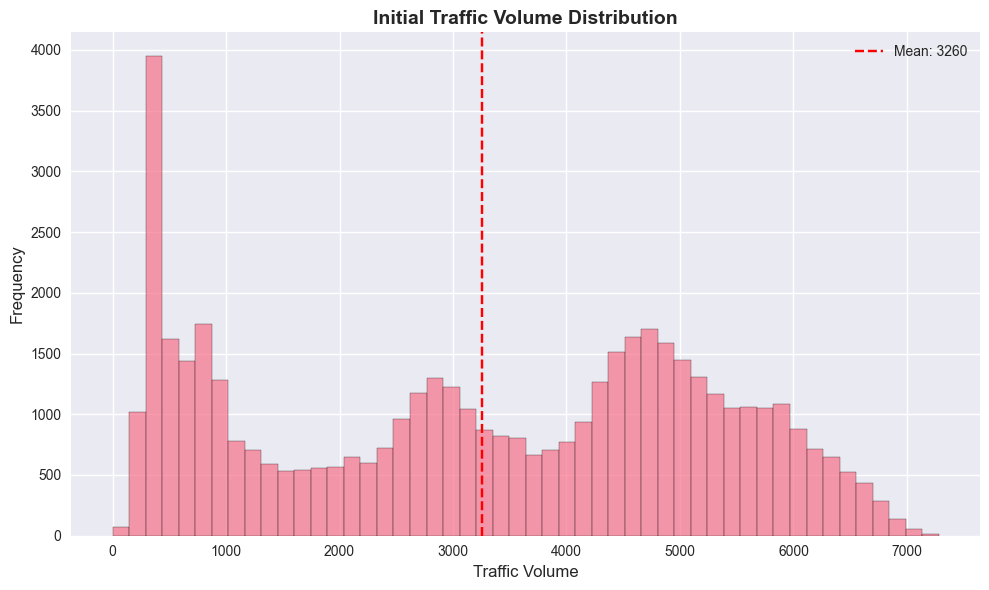

In [11]:
# Quick histogram of traffic volume (if column exists)
if 'traffic_volume' in df_raw.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_raw['traffic_volume'].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Traffic Volume', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title('Initial Traffic Volume Distribution', fontsize=14, fontweight='bold')
    ax.axvline(df_raw['traffic_volume'].mean(), color='red', linestyle='--', 
               label=f'Mean: {df_raw["traffic_volume"].mean():.0f}')
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("  'traffic_volume' column not found. Please check column names.")


## 6. Summary and Next Steps

**Key Findings:**
- Dataset shape and structure
- Missing values identified
- Data types confirmed
- Initial quality assessment complete

**Next Steps:**
- Proceed to `02_data_preprocessing.ipynb` for data cleaning and feature engineering
